# Collections:  
African-American Band Music & Recordings, 1883 to 1923

#Import the library that we use to make the http request

In [2]:
import requests

r = requests.get("https://www.loc.gov/collections/african-american-band-music/?fo=json")
r.json()

{'aka': ['aabm'],
 'breadcrumbs': [{'Library of Congress': 'https://www.loc.gov'},
  {'Digital Collections': 'https://www.loc.gov/collections/'},
  {'African-American Band Music & Recordings, 1883-1923': 'https://www.loc.gov/collections/african-american-band-music/'}],
 'categories': ['about-this-collection', 'articles-and-essays'],
 'content': {'active': True,
  'link': 'https://www.loc.gov/collections/african-american-band-music/',
  'markup': None,
  'pagination': '2 of 3',
  'partof': [],
  'results': [{'access_restricted': False,
    'aka': ['http://www.loc.gov/item/ihas.100010757/',
     'http://lcweb2.loc.gov/diglib/ihas/loc.natlib.ihas.100010757/',
     'http://lcweb2.loc.gov/diglib/ihas/loc.natlib.ihas.100010757/default.html',
     'http://www.loc.gov/resource/ihas.100010757.0/',
     'http://www.loc.gov/item/ihas.100010757',
     'http://www.loc.gov/resource/ihas.100010757.0'],
    'campaigns': [],
    'contributor': ['[larkins, john]',
     'amrican record co',
     'smith, 

 Titles of the Library of Congress collections/African-Band-Music

In [32]:
collections_json = requests.get("https://www.loc.gov/collections/african-american-band-music/?fo=json").json()

for collection in collections_json["results"]:
    print(collection["title"])

Shame on you
Indians along Broadway
All coons look alike to me
Maori : Samoan dance
Good morning Carrie
Way down yonder in the corn field
My Creole Sue
Morning, noon and night overture
I ain't had no lovin in a long time
Come out Dinah on the green
I'm a Jonah man
Oh didn't he ramble
Panama
Sally in our alley
Nobody's lookin' but de owl and de moon
Big Indian chief
He's a cousin of mine
Love's menu (Menu d'amour) : Intermezzo
My Creole Sue
Junk man rag
Rain Song
Exhortation
Yelping hound blues
Serenade blues
All in out and down


# The pagination section of the json contains the information that you need to really get everything (this list is going to be LONG!):

In [37]:
collections_json = requests.get("https://www.loc.gov/collections/african-american-band-music/?fo=json").json()

while True: #As long as we have a next page, go and fetch it
    for collection in collections_json["results"]:
        print(collection["title"]) #print out the collection's title
    next_page = collections_json["pagination"]["next"] #get the next page url
    if next_page is not None: #make sure we haven't hit the end of the pages
        collections_json = requests.get(next_page).json()
    else:
        break #we are done and can stop looping

Shame on you
Indians along Broadway
All coons look alike to me
Maori : Samoan dance
Good morning Carrie
Way down yonder in the corn field
My Creole Sue
Morning, noon and night overture
I ain't had no lovin in a long time
Come out Dinah on the green
I'm a Jonah man
Oh didn't he ramble
Panama
Sally in our alley
Nobody's lookin' but de owl and de moon
Big Indian chief
He's a cousin of mine
Love's menu (Menu d'amour) : Intermezzo
My Creole Sue
Junk man rag
Rain Song
Exhortation
Yelping hound blues
Serenade blues
All in out and down
Castle walk
Castle's half and half
At the ball
Memphis blues of Mister Crump
Memphis blues of Mister Crump
Ballin' the Jack
I ain't had no lovin' in a long time
Run brudder possum run : A Negro warning
Come after breakfast (Bring your lunch and leave 'fore supper time)
Mississippi stoker
Yelping hound blues
I'm just wild about Harry
In the baggage coach ahead
My Creole Sue
Ballin' the Jack
Swing Along!
Thunderbolt
Yelping hound blues
Bugle call rag
Bugle call ra

 # Let's grab the titles and the front covers:

In [36]:
from IPython.display import Image, display #tell python that we want to reuse some code to display the images for us

wwi_sheet_music = requests.get("https://www.loc.gov/collections/african-american-band-music/?fo=json").json() #get the JSON data
for item in wwi_sheet_music["results"]:
    print(item["title"]) #print out the title
    if "image_url" in item and len(item["image_url"]) > 0:
        display(Image(url=item["image_url"][0])) #display the front cover art

Shame on you
Indians along Broadway
All coons look alike to me
Maori : Samoan dance
Good morning Carrie
Way down yonder in the corn field
My Creole Sue
Morning, noon and night overture
I ain't had no lovin in a long time
Come out Dinah on the green
I'm a Jonah man
Oh didn't he ramble
Panama
Sally in our alley
Nobody's lookin' but de owl and de moon
Big Indian chief
He's a cousin of mine
Love's menu (Menu d'amour) : Intermezzo
My Creole Sue
Junk man rag
Rain Song
Exhortation
Yelping hound blues
Serenade blues
All in out and down


Much of the music was published by multiple organizations or people and around the country and world. We'll use some python code to display the list of publishers and created date of the titles:

In [24]:
wwi_sheet_music = requests.get("https://www.loc.gov/collections/african-american-band-music/?fo=json").json()
for item in wwi_sheet_music["results"]:
    item_json = requests.get(item["id"] + "?fo=json").json()
    print("'%s', %s" % (item_json["item"]["title"], item_json["item"]["created_published"]))

'Shame on you', ['Amrican Record Co., [1904].']
'Indians along Broadway', ['American Record Co., [1904].']
'All coons look alike to me', ['Berliner Grammophone, 1896.']
'Maori : Samoan dance', ['Cameo, [1923].']
'Good morning Carrie', ['Columbia, [1901].']
'Way down yonder in the corn field', ['Columbia, [1901].']


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Graph of the places where the music was published for the first 25 items. Note, music can have multiple places where it was published.

<Axes: >

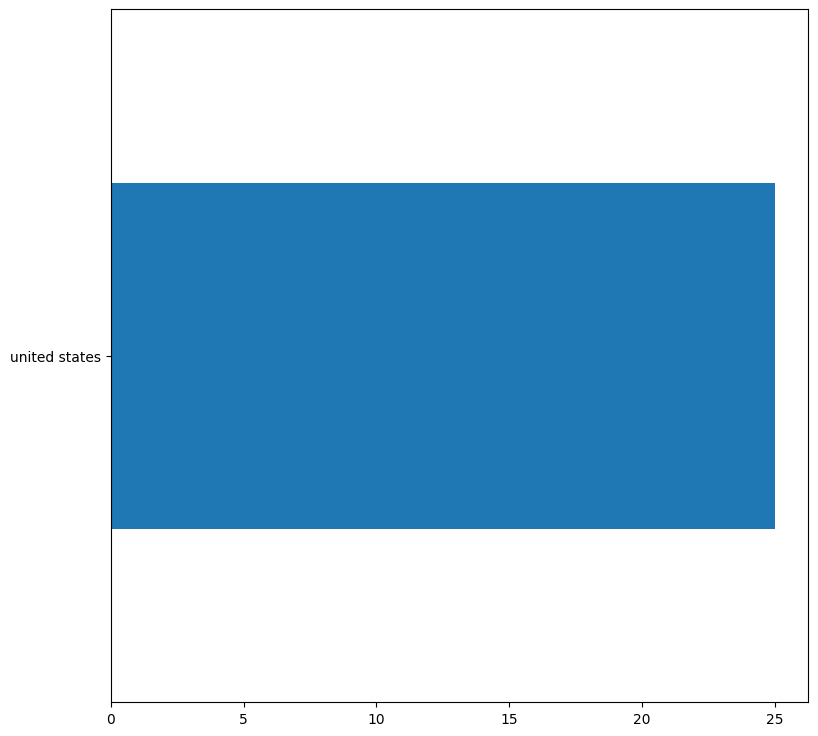

In [25]:
import pandas as pd
%matplotlib inline
from collections import Counter
location_counter = Counter()
wwi_sheet_music = requests.get("https://www.loc.gov/collections/african-american-band-music/?fo=json").json()

for item in wwi_sheet_music["results"]:
    if item['location'] is not None: #check that the item has a location, since it is optional
        for location in item['location']:
            location_counter[location] += 1 #add one for the location

locations = pd.Series(location_counter)
locations.sort_values(ascending=True).plot(kind='barh', figsize=(9,9))